In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Trading-features.csv")

In [3]:
df.head()

,id,last_price,created_at,f1,f2,f3,f4,f5,f6,f7,...,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161
0,55466910,43138.2,2023-12-27 12:47:41.916971,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
1,55466909,43138.2,2023-12-27 12:47:40.693372,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
2,55466908,43138.2,2023-12-27 12:47:39.968797,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
3,55466907,43138.2,2023-12-27 12:47:38.919784,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
4,55466906,43132.6,2023-12-27 12:47:37.881533,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,...,689.6,-129.4,689.6,-129.4,-129.4,689.6,689.6,-129.4,-129.4,689.6


In [4]:
df['created_at']=pd.to_datetime(df['created_at'])
df['date']=df['created_at'].dt.strftime('%Y-%m-%d')
df['created_at']=df['created_at'].dt.strftime('%H:%M:%S')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 165 entries, id to date
dtypes: float64(136), int64(27), object(2)
memory usage: 12.6+ MB


In [6]:
# Get the column indices for columns f11 to f161
start_index = df.columns.get_loc('f1')
end_index = df.columns.get_loc('f161') + 1  # Adding 1 to include the 'f161' column

# Drop the columns in the specified range
df = df.drop(df.columns[start_index:end_index], axis=1)

In [7]:
df.head()

,id,last_price,created_at,date
0,55466910,43138.2,12:47:41,2023-12-27
1,55466909,43138.2,12:47:40,2023-12-27
2,55466908,43138.2,12:47:39,2023-12-27
3,55466907,43138.2,12:47:38,2023-12-27
4,55466906,43132.6,12:47:37,2023-12-27


In [8]:
# Create a new column 'Price_Status' and initialize with 0
# df['Price_Status'] = nan
# # Condition for price decrease
# decrease_condition = df['last_price'] < df['last_price'].shift(1)
# df.loc[decrease_condition, 'Price_Status'] = 0
# # Condition for price increase
# increase_condition = df['last_price'] > df['last_price'].shift(1)
# df.loc[increase_condition, 'Price_Status'] = 1

df['Price_Status'] = df['last_price'].diff().gt(0).astype(int).fillna(0)

In [9]:
df.head(10)

,id,last_price,created_at,date,Price_Status
0,55466910,43138.2,12:47:41,2023-12-27,0
1,55466909,43138.2,12:47:40,2023-12-27,0
2,55466908,43138.2,12:47:39,2023-12-27,0
3,55466907,43138.2,12:47:38,2023-12-27,0
4,55466906,43132.6,12:47:37,2023-12-27,0
5,55466905,43132.6,12:47:36,2023-12-27,0
6,55466904,43132.5,12:47:35,2023-12-27,0
7,55466903,43135.7,12:47:34,2023-12-27,1
8,55466902,43135.7,12:47:33,2023-12-27,0
9,55466901,43135.7,12:47:32,2023-12-27,0


In [10]:
df.tail(10)

,id,last_price,created_at,date,Price_Status
9990,55456908,42765.2,10:00:14,2023-12-27,1
9991,55456907,42763.5,10:00:13,2023-12-27,0
9992,55456906,42762.0,10:00:12,2023-12-27,0
9993,55456905,42759.6,10:00:11,2023-12-27,0
9994,55456904,42758.0,10:00:10,2023-12-27,0
9995,55456903,42753.6,10:00:09,2023-12-27,0
9996,55456902,42753.6,10:00:08,2023-12-27,0
9997,55456901,42753.6,10:00:07,2023-12-27,0
9998,55456900,42753.7,10:00:06,2023-12-27,1
9999,55456899,42765.6,10:00:05,2023-12-27,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10000 non-null  int64  
 1   last_price    10000 non-null  float64
 2   created_at    10000 non-null  object 
 3   date          10000 non-null  object 
 4   Price_Status  10000 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 351.7+ KB


In [12]:
df.drop('id',axis=1,inplace=True)

In [13]:
df.shape

(10000, 4)

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(10000, 4)

In [16]:
# # Time Series Analysis
# plt.figure(figsize=(12, 6))
# sns.lineplot(x='created_at', y='last_price', data=df)
# plt.title('Time Series Analysis - Last Price over Time')
# plt.show()

In [17]:
# # Distribution of Price_Status
# plt.figure(figsize=(8, 6))
# sns.countplot(x='Price_Status', data=df)
# plt.title('Distribution of Price_Status')
# plt.show()

In [18]:
df.columns

Index(['last_price', 'created_at', 'date', 'Price_Status'], dtype='object')

In [19]:
df['Price_Status'].value_counts()

0    6777
1    3223
Name: Price_Status, dtype: int64

In [20]:
# Assuming 'created_at' and 'date' are datetime columns
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = pd.to_datetime(df['date'])

In [21]:
# Extract relevant information from 'created_at'
df['created_at_hour'] = df['created_at'].dt.hour
df['created_at_minute'] = df['created_at'].dt.minute
df['created_at_second'] = df['created_at'].dt.second

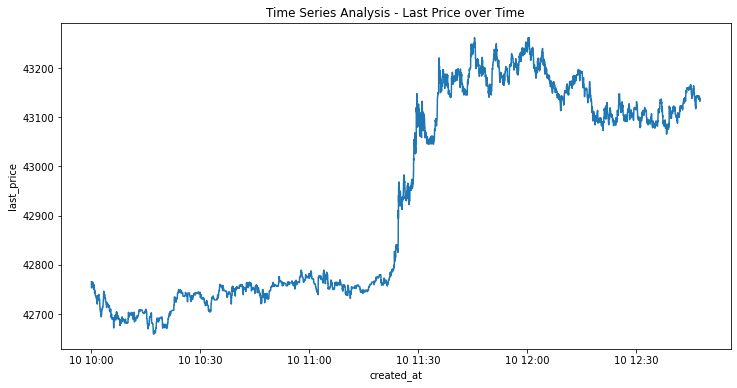

In [22]:
# Time Series Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='created_at', y='last_price', data=df)
plt.title('Time Series Analysis - Last Price over Time')
plt.show()

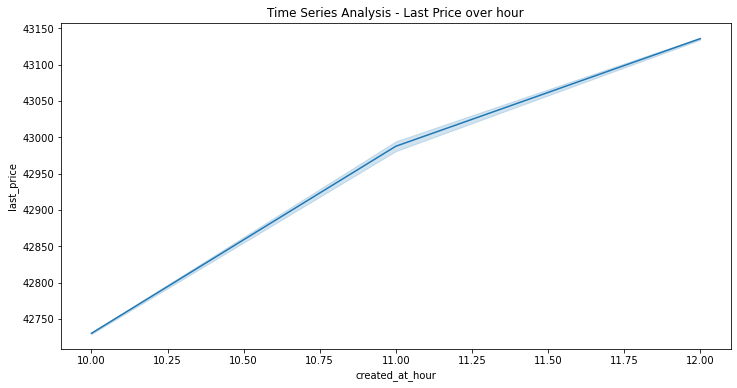

In [23]:
# Time Series Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='created_at_hour', y='last_price', data=df)
plt.title('Time Series Analysis - Last Price over hour')
plt.show()

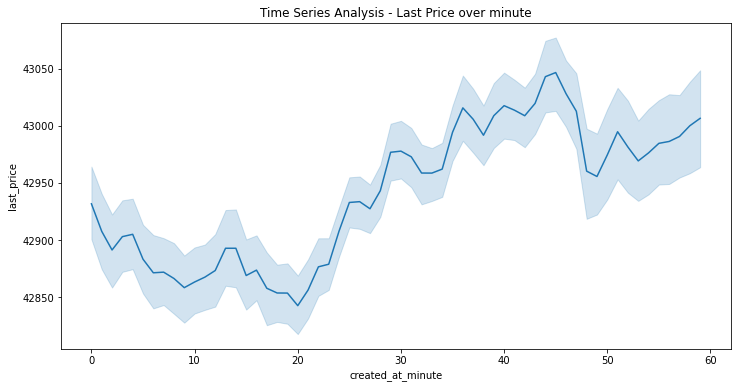

In [24]:
# Time Series Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='created_at_minute', y='last_price', data=df)
plt.title('Time Series Analysis - Last Price over minute')
plt.show()

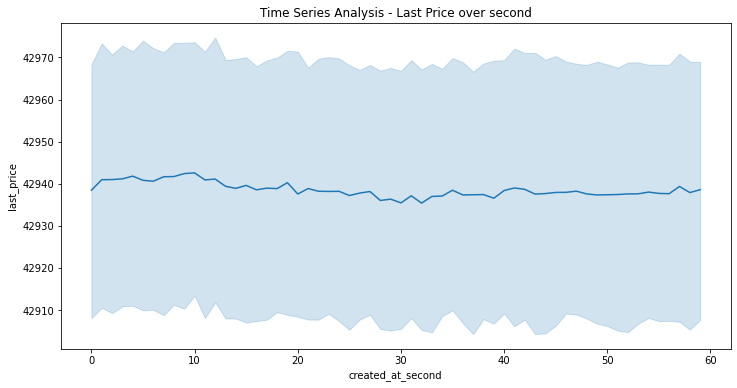

In [25]:
# Time Series Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='created_at_second', y='last_price', data=df)
plt.title('Time Series Analysis - Last Price over second')
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   last_price         10000 non-null  float64       
 1   created_at         10000 non-null  datetime64[ns]
 2   date               10000 non-null  datetime64[ns]
 3   Price_Status       10000 non-null  int32         
 4   created_at_hour    10000 non-null  int64         
 5   created_at_minute  10000 non-null  int64         
 6   created_at_second  10000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(3)
memory usage: 507.9 KB


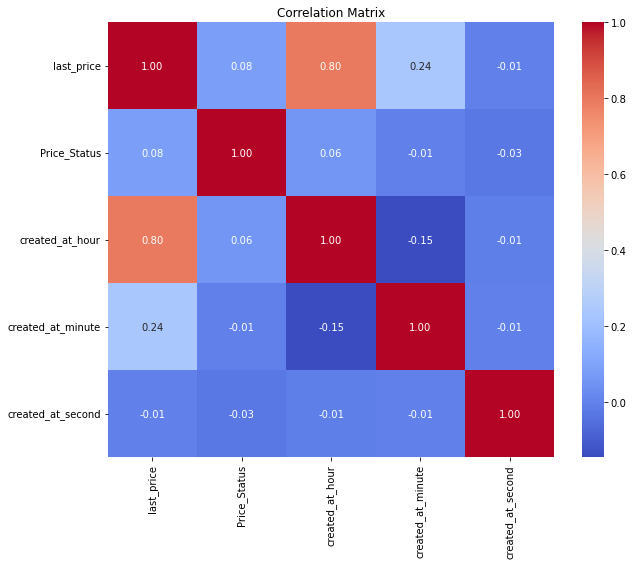

In [27]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [28]:
# Step 2: Split the Data
X = df.drop(['Price_Status','date','created_at'], axis=1)  # Features
y = df['Price_Status']  # Target variable

In [29]:
X

,last_price,created_at_hour,created_at_minute,created_at_second
0,43138.2,12,47,41
1,43138.2,12,47,40
2,43138.2,12,47,39
3,43138.2,12,47,38
4,43132.6,12,47,37
...,...,...,...,...
9995,42753.6,10,0,9
9996,42753.6,10,0,8
9997,42753.6,10,0,7
9998,42753.7,10,0,6


In [30]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    1
9999    1
Name: Price_Status, Length: 10000, dtype: int32

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Step 3: Choose a Classification Model
# Using a Support Vector Machine (SVM) with a linear kernel
model = SVC()

In [33]:
# Step 4: Train the Model
model.fit(X_train, y_train)

SVC()

In [34]:
# Step 5: Evaluate the Model
y_pred = model.predict(X_test)

In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.696
Confusion Matrix:
[[1392    0]
 [ 608    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      1392
           1       0.00      0.00      0.00       608

    accuracy                           0.70      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.48      0.70      0.57      2000



C:\Users\Hamza_Mustafa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hamza_Mustafa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hamza_Mustafa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
